In [1]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

Load dataset

In [15]:
current_dir = os.getcwd() 
relative_path = os.path.join('..', 'data', 'dataset.csv')
dataset = pd.read_csv(os.path.join(current_dir, relative_path))

Explore dataset

In [16]:
print(dataset.shape)

(1470, 35)


In [17]:
print(dataset.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [18]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [19]:
print(dataset.info)

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

Delete duplicate data [If exist]

In [20]:
dataset.duplicated().any()

False

In [21]:
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [22]:
# generates descriptive statistics of the training data
# include="O": This parameter is specifying that you want to include columns with object data type 
dataset.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [28]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
# compute the number of unique values for each column in the DataFrame dataset.
dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [24]:
# Print the unique values in each column
for column in dataset.columns:
    print(f"'{column}': {dataset[column].unique()}")
    print("_______________________________________________________")

'Age': [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
_______________________________________________________
'Attrition': ['Yes' 'No']
_______________________________________________________
'BusinessTravel': ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
_______________________________________________________
'DailyRate': [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1

In [25]:
# Print the number of null values in each column in the data
print(dataset.isnull().sum())


# The dataset has 0 missing values.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: xlabel='Attrition', ylabel='count'>

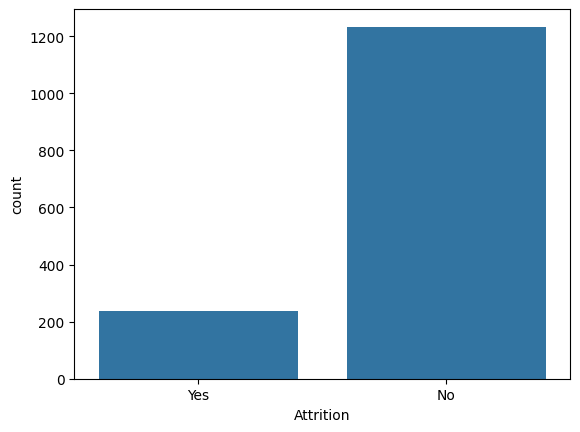

In [26]:
sns.countplot(data = dataset,x = 'Attrition')

Drop the unnecessary columns

In [27]:
dataset.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

# EmployeeNumber == ID of the employee [Not important]
# Over18, StandardHours and EmployeeCount have one value.

Handling categorical variables

In [29]:
obj_cols = dataset.select_dtypes(include = 'object').columns
print("number of categorical variable : ",len(obj_cols))
obj_cols

number of categorical variable :  8


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [30]:
encoder = LabelEncoder()
for i in obj_cols:
    dataset[i] = encoder.fit_transform(dataset[i])

In [31]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


<Axes: xlabel='Attrition', ylabel='count'>

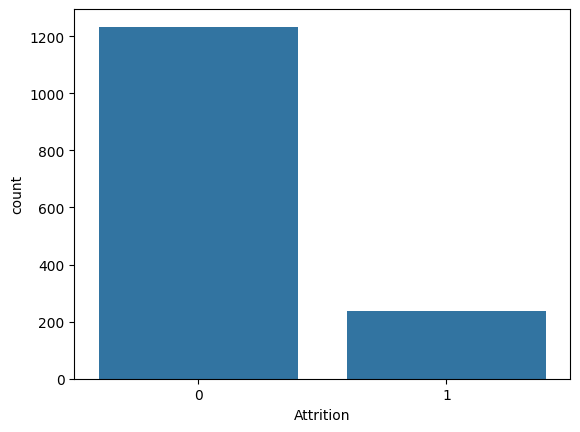

In [38]:
sns.countplot(data = dataset,x = 'Attrition')

In [46]:
# Count the occurrences of 0 in the data
count_zero = dataset['Attrition'].eq(0).sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(dataset)

# Calculate the percentage of rows with the specified value
percentage_zero = (count_zero / total_rows) * 100

print(f"Percentage of rows with value '{0}': {percentage_zero:.2f}%")

Percentage of rows with value '0': 83.88%


In [47]:
# Count the occurrences of 0 in the data
count_one = dataset['Attrition'].eq(1).sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(dataset)

# Calculate the percentage of rows with the specified value
percentage_one = (count_one / total_rows) * 100

print(f"Percentage of rows with value '{1}': {percentage_one:.2f}%")

Percentage of rows with value '1': 16.12%


In [49]:
# Calculate the percentage of rows with the specified value
portion = (count_zero / count_one)

print(f"Portion of rows with value '{1}' / ows with value '{0}' : {portion:.2f}")

Portion of rows with value '1' / ows with value '0' : 5.20


Correlation

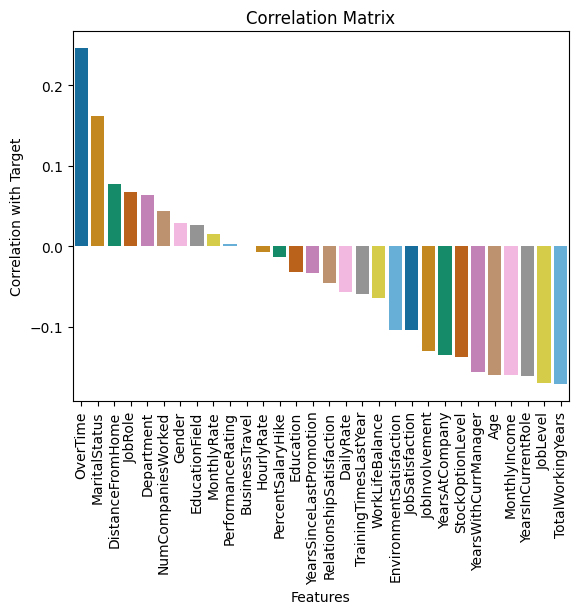

In [33]:
features = dataset.drop(columns = ['Attrition'])
correlation = features.corrwith((dataset.Attrition)).sort_values(ascending = False)

sns.barplot(x=correlation.index, y=correlation.values, hue=correlation.index, palette='colorblind', legend=False)

plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

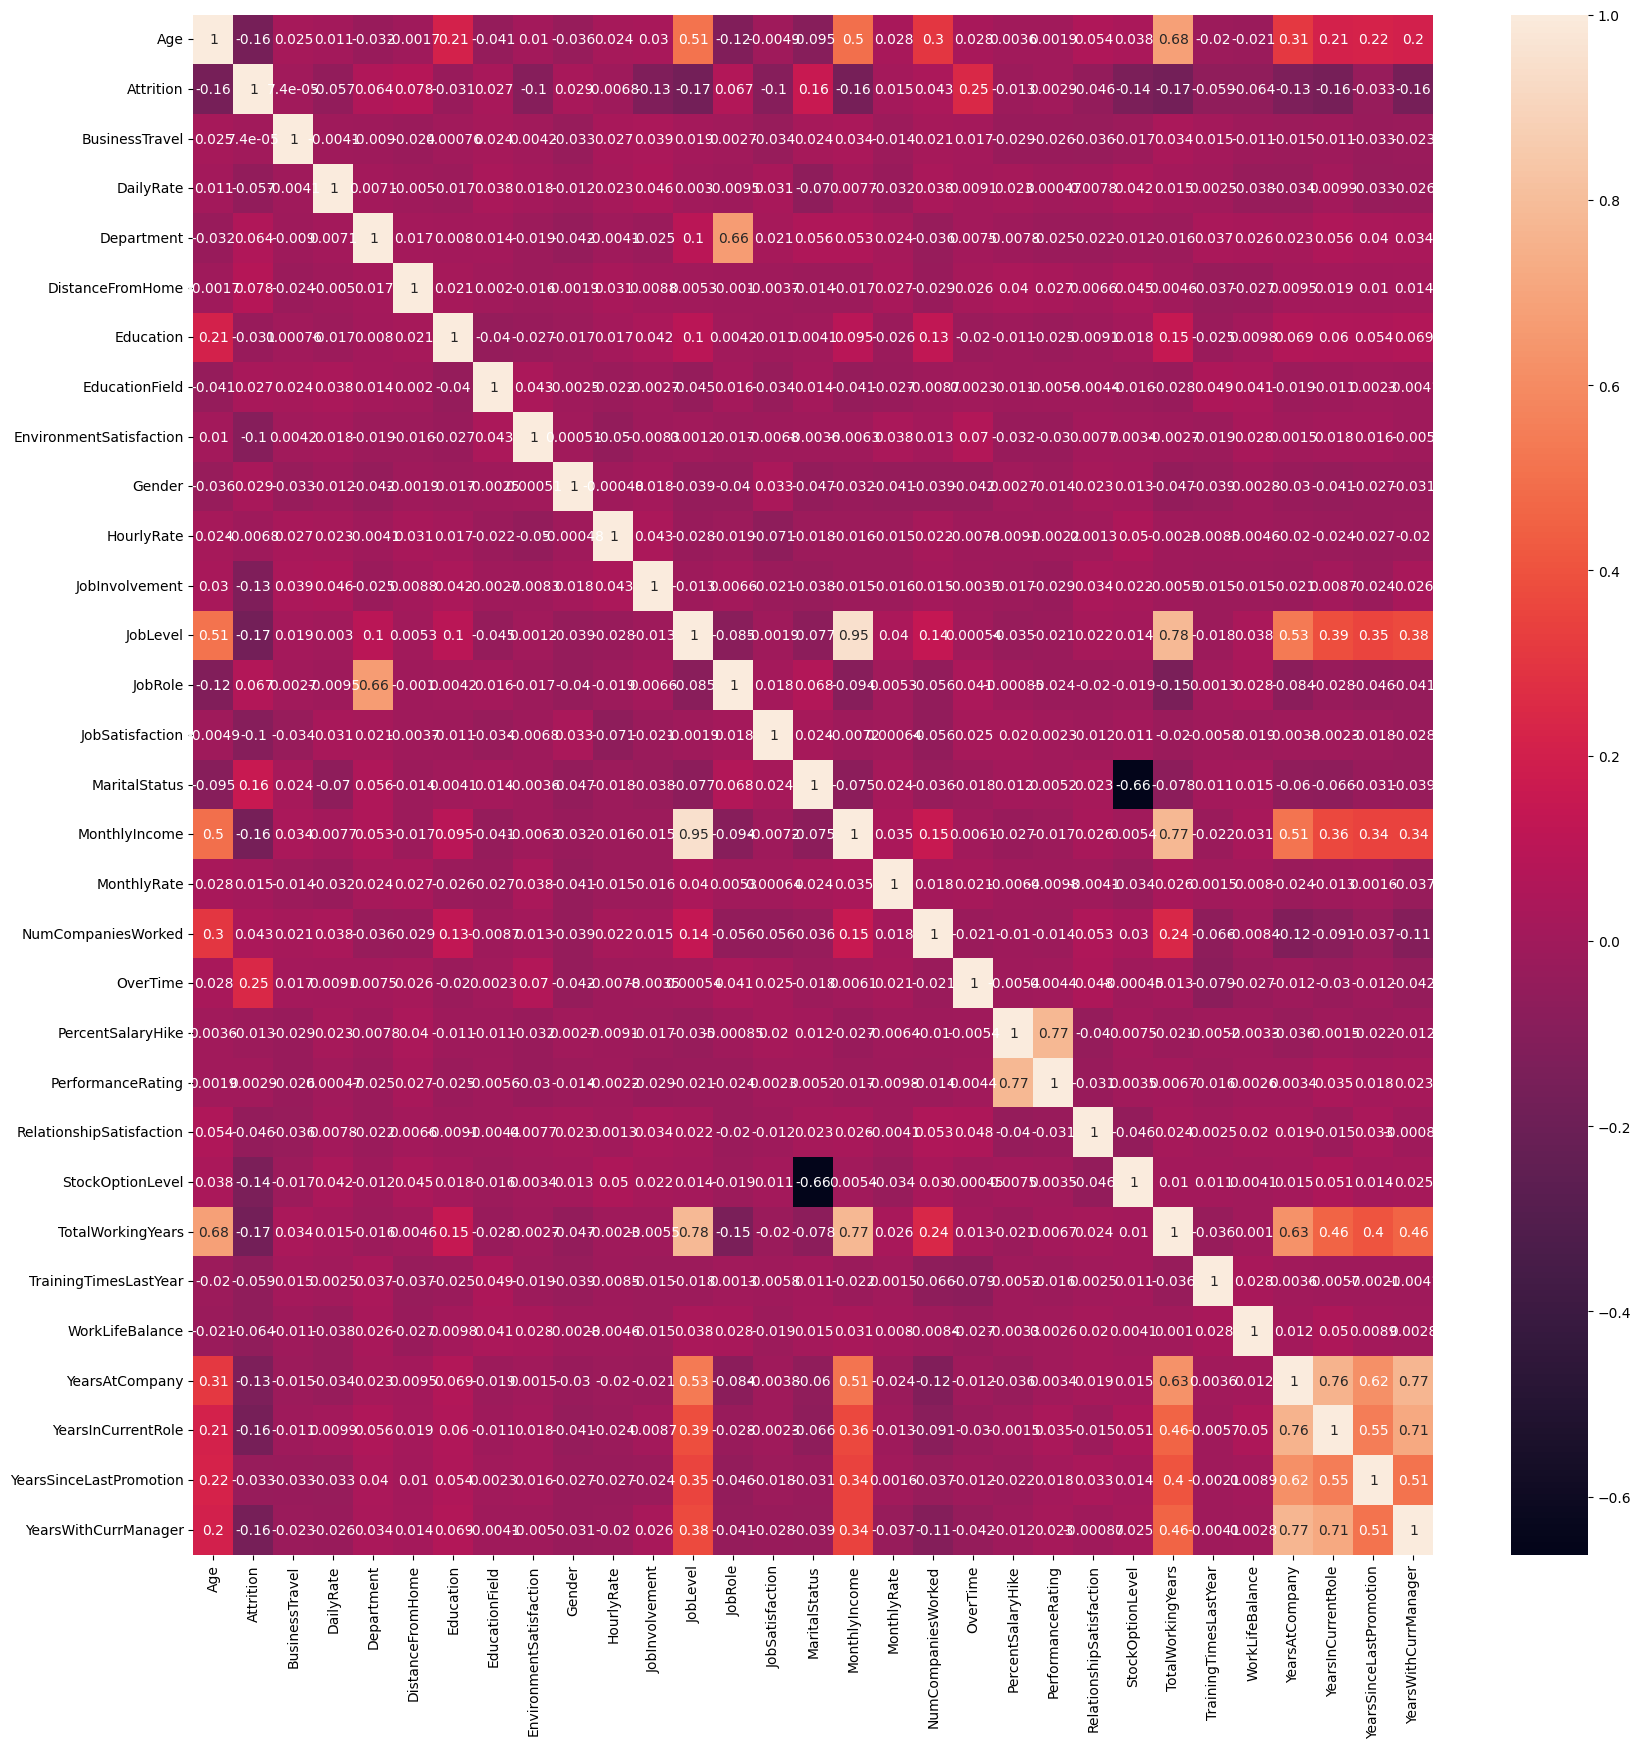

In [34]:
correlations=dataset.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations,annot=True)

In [35]:
'''
There are high correlation between some features:
    MonthlyIncome & joblevel ===> drop MonthlyIncome
    Total working years & Joblevel ===> drop TotalWorkingYears
    years in current role, years at company & years with current manager

Remove MonthlyIncome,TotalWorkingYears, YearsInCurrentRole and YearsWithCurrManager
taking a cutoff of 0.7 correlation coefficient. 
This will retain JobLevel and YearsAtCompany and remove possibility of multicollinearity from the features

'''
dataset = dataset.drop(columns=['MonthlyIncome','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'])

Feature Engineering

In [36]:
# 'EnviornmentSatisfaction', 'JobInvolvement', 'JobSatisfacction', 'RelationshipSatisfaction', 'WorklifeBalance' can be clubbed into a single feature 'TotalSatisfaction'

dataset['Total_Satisfaction'] = (dataset['EnvironmentSatisfaction'] + 
                            dataset['JobInvolvement'] + 
                            dataset['JobSatisfaction'] + 
                            dataset['RelationshipSatisfaction'] +
                            dataset['WorkLifeBalance']) /5 

# Drop Columns
dataset.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

Split & save preprocessed dataset

In [37]:

# Split the dataset into features (X) and target (y)
X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for training set
train_data = pd.concat([X_train, y_train], axis=1)

# Combine X_test and y_test for testing set
test_data = pd.concat([X_test, y_test], axis=1)

relative_path = os.path.join('..', 'data', 'train.csv')
test_data.to_csv(os.path.join(current_dir, relative_path), index=False) # exclude the DataFrame index from being saved to the CSV file.

relative_path = os.path.join('..', 'data', 'test.csv')
test_data.to_csv(os.path.join(current_dir, relative_path), index=False) # exclude the DataFrame index from being saved to the CSV file.